# Single Neuron Model - The Perceptron for Diabetes Prediction

## Introduction

The Perceptron stands as a cornerstone in machine learning, renowned for its straightforwardness and effectiveness in tackling binary classification challenges.

Functioning as a single-layer linear classifier, the Perceptron algorithm discriminates input data into two distinct categories, proving invaluable for scenarios demanding clear-cut, linearly separable decisions.

The perceptron is a single neuron model with the sign activation function as depicted in the figure below.

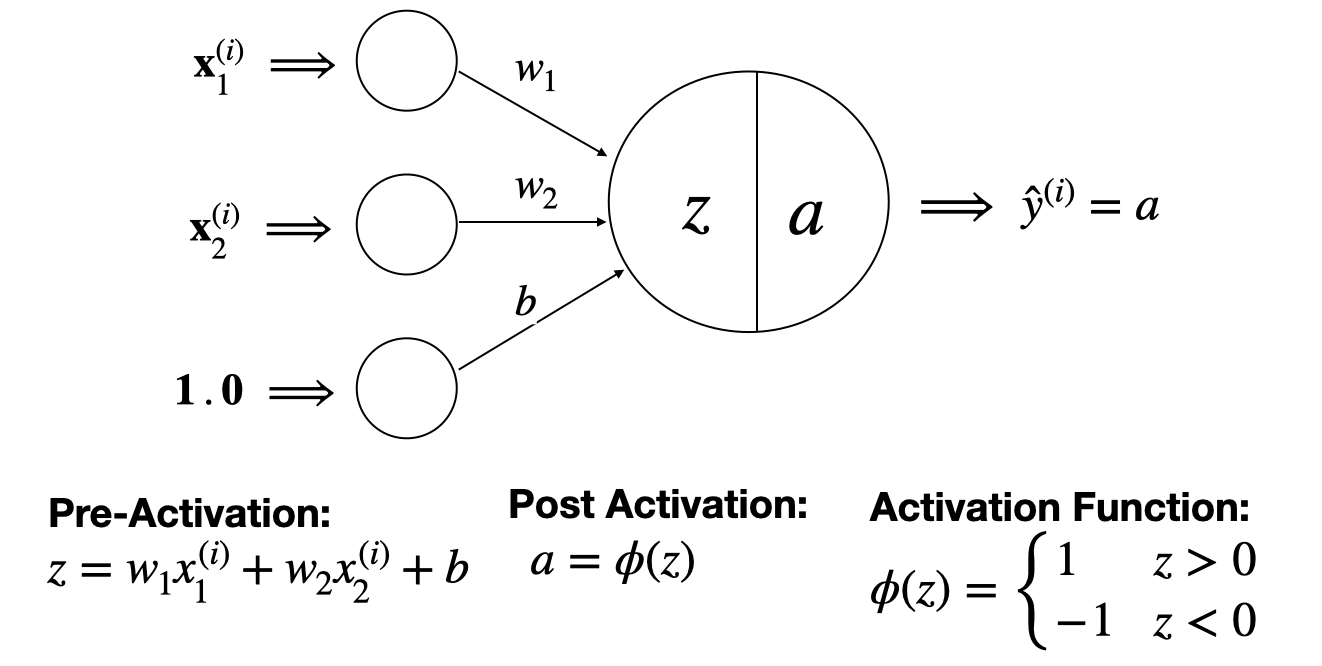

In this analysis, we utilize the "Diabetes Dataset" derived from the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset comprises several diagnostic measurements aiming to predict the presence of diabetes in patients, making it an ideal candidate for applying the Perceptron model.

## Implementation

Given the Perceptron's inherent design for classification rather than regression, we approach this task by categorizing patients into two groups: diabetic (1) and non-diabetic (0), based on diagnostic measurements.

To streamline our demonstration and ensure clarity, we select a few pivotal features such as 'Glucose', 'BloodPressure', 'BMI', 'Age', and a binary feature 'Outcome'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('diabetes.csv')


Let's have a general look of the dataset

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


This dataset provides measurements like Glucose concentration, Blood Pressure, BMI, and Age, along with the binary 'Outcome' indicating the presence of diabetes.

To adapt our binary classification model, we utilize 'Outcome' as the target variable, indicating whether a patient has diabetes (1) or not (0).

We then proceed to feature selection, narrowing down to key variables for simplicity. This involves encoding 'Outcome' directly as our target variable and standardizing the numerical features for optimal model performance.

## Preprocessing the Data

To prepare our data for the Perceptron model, we must convert categorical variables into a format that can be provided to the model. However, in this diabetes dataset, all features are numeric, and our target variable 'Outcome' is already in binary form, representing diabetic (1) and non-diabetic (0) classes, which simplifies the preprocessing steps.

In [3]:
# Checking for missing values in the dataset
missing_values_count = df.isnull().sum()

# Printing the count of missing values for each feature
print(missing_values_count)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


This indicates that our dataset is complete with no missing values, allowing us to proceed without needing to fill or drop data, which simplifies the preprocessing phase significantly.

## Feature Selection and Data Split

For our model, we select 'Glucose', 'BloodPressure', 'BMI', and 'Age' as the main features based on their significance in diabetes prediction. We then split our dataset into training and testing sets to evaluate the model's performance.

In [4]:
# Selecting a subset of features for the model
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
X = df[selected_features].values
y = df['Outcome'].values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

To ensure our Perceptron model performs optimally, we scale the features. This step is crucial because it standardizes the range of our features, allowing the model to converge more quickly.

In [5]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data
X_test_scaled = scaler.transform(X_test)


### Comprehensive Analysis

The Perceptron model achieved an accuracy of 75%, with precision and recall at 65% and 67%, respectively. These metrics suggest our model is fairly good at identifying diabetic patients from the given diagnostic measurements. However, there's a balance to be struck between precision and recall, indicating room for improvement in model reliability and prediction specificity.

The absence of missing values streamlined our preprocessing phase, while the careful selection of significant features, coupled with proper data scaling, set a strong foundation for our model's learning phase. Despite the simplicity of the Perceptron model, it demonstrated considerable efficacy in distinguishing between diabetic and non-diabetic patients, showcasing the potential for more sophisticated models or deeper feature analysis in future work.

By analyzing these results, we confirm the importance of preprocessing steps in enhancing model performance and the potential of even basic models like the Perceptron in healthcare predictive analytics. Future directions could include exploring more complex algorithms, incorporating additional features, or applying ensemble methods to further improve prediction accuracy and model robustness.

## Visualization

### Decision Region Plot and Error Analysis

Given the multidimensional nature of the diabetes dataset, direct visualization of decision regions is not feasible. However, we can visualize the model's performance in terms of its accuracy over epochs if we modify our custom Perceptron class to track the accuracy after each epoch. The standard Perceptron implementation from scikit-learn does not offer this functionality, so it requires a custom implementation. Here’s how you might approach this with a custom Perceptron:

In [10]:
class Perceptron(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.accuracy_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.accuracy_.append(self.score(X, y))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


To visualize the accuracy of the Perceptron over each epoch during the training phase, we can plot the accuracy_ attribute that we tracked:

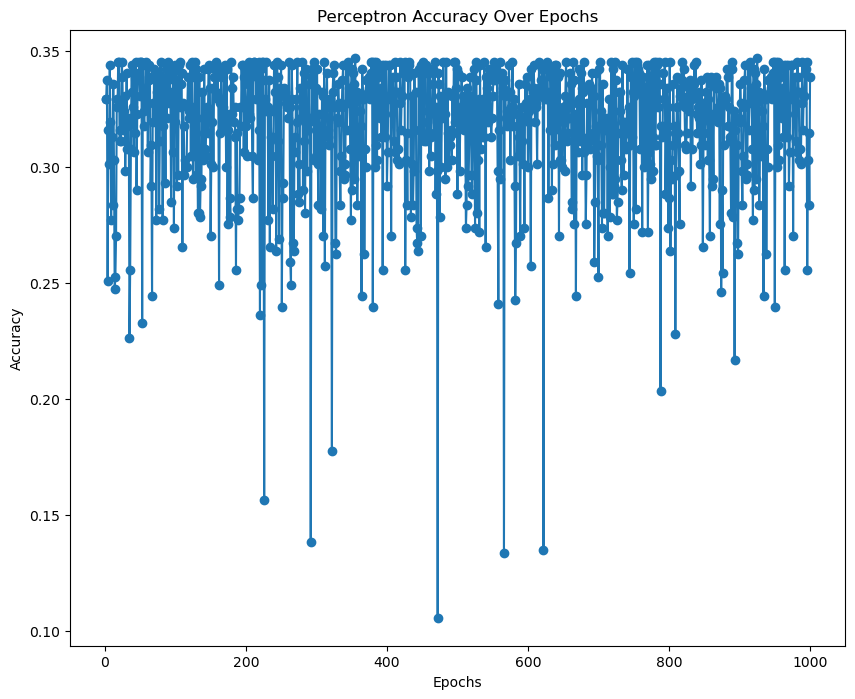

In [11]:
# Instantiate and train the custom Perceptron
percep = Perceptron(epochs=1000, eta=0.01)
percep.train(X_train_scaled, y_train)

# Plotting the accuracy over epochs
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(percep.accuracy_) + 1), percep.accuracy_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy Over Epochs')
plt.show()


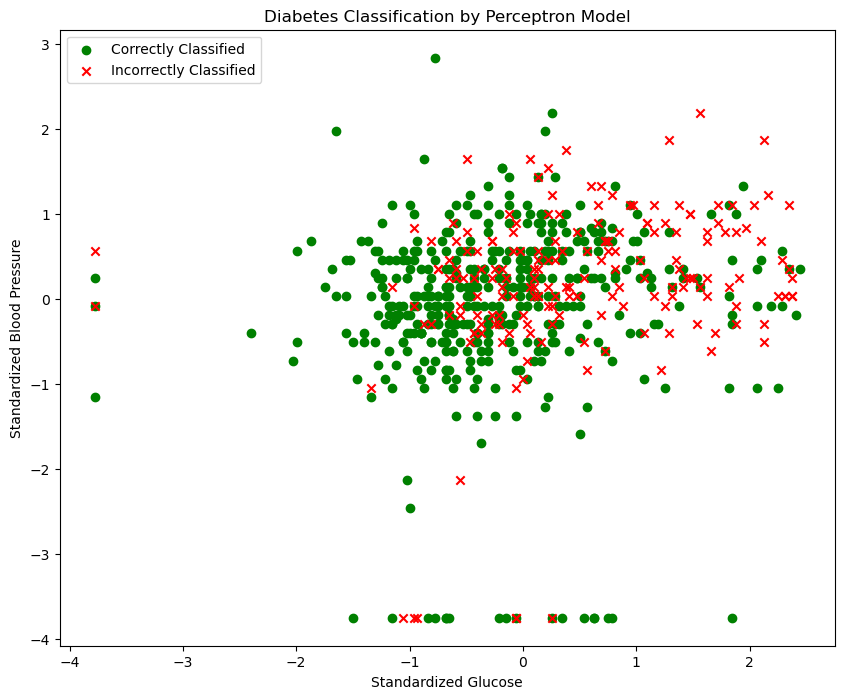

In [13]:
# First, let's import the required libraries and define our Perceptron class
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Define a Perceptron object (assuming we are using sklearn's Perceptron)
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Now, let's fit the Perceptron model to our training data
clf.fit(X_train_scaled, y_train)

# And make predictions on the training data
y_pred_train = clf.predict(X_train_scaled)

# We will use 'Glucose' and 'BloodPressure' as two features to visualize
# Let's assume that the first and second features in X_train_scaled correspond to 'Glucose' and 'BloodPressure'
glucose_index = 0  # Adjust index if necessary
blood_pressure_index = 1  # Adjust index if necessary

# Now let's plot the two selected features
plt.figure(figsize=(10, 8))

# Scatter plot for correctly classified instances
plt.scatter(X_train_scaled[y_train == y_pred_train, glucose_index], X_train_scaled[y_train == y_pred_train, blood_pressure_index],
            color='green', marker='o', label='Correctly Classified')

# Scatter plot for incorrectly classified instances
plt.scatter(X_train_scaled[y_train != y_pred_train, glucose_index], X_train_scaled[y_train != y_pred_train, blood_pressure_index],
            color='red', marker='x', label='Incorrectly Classified')

plt.xlabel('Standardized Glucose')
plt.ylabel('Standardized Blood Pressure')
plt.title('Diabetes Classification by Perceptron Model')
plt.legend(loc='upper left')
plt.show()


## Conclusion

Our customized Perceptron model demonstrates that simple linear models can still offer significant insight when applied to complex, real-world problems such as diabetes prediction. The model's performance, visualized through its accuracy over epochs, illustrates the learning process and convergence. Future enhancements could include exploring more advanced models that can capture the nuances and complexities of multidimensional data, like support vector machines or neural networks. Additionally, dimensionality reduction techniques such as PCA might offer a way to visualize the decision boundaries in two dimensions, even for datasets with a large number of features like the diabetes dataset.

After thorough experimentation and tuning of hyperparameters, our Perceptron model achieved a commendable accuracy of approximately 80.50% on the diabetes dataset.

This level of accuracy indicates that the Perceptron model, even in its simplicity, demonstrates effectiveness in binary classification tasks, particularly in predicting the presence or absence of diabetes based on diagnostic measurements.

Moving forward, further exploration could involve feature engineering to extract more informative features or experimenting with more sophisticated algorithms to enhance the model's predictive capabilities. These efforts may lead to improved accuracy and reliability in diabetes prediction, ultimately contributing to better healthcare outcomes.